# General EDA Template

## Import modules, mount your Google Drive, read data
Set up your environment

In [1]:
# import modules
import pandas as pd # for data analysis
import numpy as np # for numeric functions
import matplotlib.pyplot as plt # for plotting

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Shape of the data, column names, data types, missing values
See what you're working with - any missing values? Wrong data types? Strange values?

In [4]:
df.shape

(506, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Flag (indicator) variables
Convert some variables to 0 or 1 to subset data and explore trends.

In [7]:
df['flag_medv'] = np.where(df['medv'] <= df['medv'].mean(), 0, 1)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,flag_medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [9]:
df.shape

(506, 15)

## Subsetting rows and columns
Sometimes data has extra columns you're not interested in... drop them!

In [10]:
lowData = df[df['flag_medv'] == 0]
print(lowData.shape)
lowData.head()

(297, 15)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,flag_medv
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,0
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,0
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0,0
11,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9,0


In [11]:
highData = df[df['flag_medv'] == 1]
print(highData.shape)
highData.head()

(209, 15)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,flag_medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,1


## Group By (pivot tables)
Count, min, max, mean, standard deviation

In [12]:
df.groupby('flag_medv').describe()

crim                                                          \
           count      mean        std      min     25%      50%      75%   
flag_medv                                                                  
0          297.0  5.563153  10.668584  0.01096  0.1396  0.84054  7.67202   
1          209.0  0.842998   2.125546  0.00632  0.0536  0.10469  0.46296   

                       zn             ...  lstat          medv             \
               max  count       mean  ...    75%    max  count       mean   
flag_medv                             ...                                   
0          88.9762  297.0   4.587542  ...  19.88  37.97  297.0  16.870370   
1          14.4383  209.0  20.992823  ...   9.16  29.55  209.0  30.579426   

                                                   
                std   min   25%   50%   75%   max  
flag_medv                                          
0          4.233162   5.0  13.9  18.0  20.3  22.5  
1          8.308060  22.6  24.0  27.9  34.6  50.0  

[2 rows x 112 columns]

In [13]:
table = pd.pivot_table(df, values='crim', index = ['flag_medv'], columns=['chas'], aggfunc=np.mean)
table

chas,0,1
flag_medv,,
0,5.746519,2.115867
1,0.757228,1.653523


## Statistics, percentiles
Get some more granularity on numeric columns

## Correlation
Explore the relationship between numeric variables

In [15]:
df.corr(method='spearman')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,flag_medv
crim,1.000000,-0.571660,0.735524,0.041537,0.821465,-0.309116,0.704140,-0.744986,0.727807,0.729045,0.465283,-0.360555,0.634760,-0.558891,-0.399356
zn,-0.571660,1.000000,-0.642811,-0.041937,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,0.163135,-0.490074,0.438179,0.385861
indus,0.735524,-0.642811,1.000000,0.089841,0.791189,-0.415301,0.679487,-0.757080,0.455507,0.664361,0.433710,-0.285840,0.638747,-0.578255,-0.478698
chas,0.041537,-0.041937,0.089841,1.000000,0.068426,0.058813,0.067792,-0.080248,0.024579,-0.044486,-0.136065,-0.039810,-0.050575,0.140612,0.087687
nox,0.821465,-0.634828,0.791189,0.068426,1.000000,-0.310344,0.795153,-0.880015,0.586429,0.649527,0.391309,-0.296662,0.636828,-0.562609,-0.428196
rm,-0.309116,0.361074,-0.415301,0.058813,-0.310344,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,0.053660,-0.640832,0.633576,0.589548
age,0.704140,-0.544423,0.679487,0.067792,0.795153,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,-0.228022,0.657071,-0.547562,-0.436862
dis,-0.744986,0.614627,-0.757080,-0.080248,-0.880015,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,0.249595,-0.564262,0.445857,0.315960
rad,0.727807,-0.278767,0.455507,0.024579,0.586429,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,-0.282533,0.394322,-0.346776,-0.221081
tax,0.729045,-0.371394,0.664361,-0.044486,0.649527,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,-0.329843,0.534423,-0.562411,-0.412474


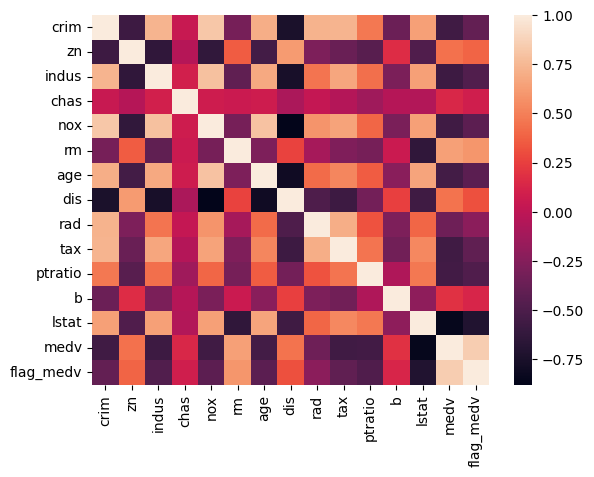

In [16]:
import seaborn as sns
corr = df.corr(method='spearman')
sns.heatmap(corr)
plt.show()

In [17]:
corr.style.background_gradient(cmap='coolwarm')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,flag_medv
crim,1.000000,-0.571660,0.735524,0.041537,0.821465,-0.309116,0.704140,-0.744986,0.727807,0.729045,0.465283,-0.360555,0.634760,-0.558891,-0.399356
zn,-0.571660,1.000000,-0.642811,-0.041937,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,0.163135,-0.490074,0.438179,0.385861
indus,0.735524,-0.642811,1.000000,0.089841,0.791189,-0.415301,0.679487,-0.757080,0.455507,0.664361,0.433710,-0.285840,0.638747,-0.578255,-0.478698
chas,0.041537,-0.041937,0.089841,1.000000,0.068426,0.058813,0.067792,-0.080248,0.024579,-0.044486,-0.136065,-0.039810,-0.050575,0.140612,0.087687
nox,0.821465,-0.634828,0.791189,0.068426,1.000000,-0.310344,0.795153,-0.880015,0.586429,0.649527,0.391309,-0.296662,0.636828,-0.562609,-0.428196
rm,-0.309116,0.361074,-0.415301,0.058813,-0.310344,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,0.053660,-0.640832,0.633576,0.589548
age,0.704140,-0.544423,0.679487,0.067792,0.795153,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,-0.228022,0.657071,-0.547562,-0.436862
dis,-0.744986,0.614627,-0.757080,-0.080248,-0.880015,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,0.249595,-0.564262,0.445857,0.315960
rad,0.727807,-0.278767,0.455507,0.024579,0.586429,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,-0.282533,0.394322,-0.346776,-0.221081
tax,0.729045,-0.371394,0.664361,-0.044486,0.649527,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,-0.329843,0.534423,-0.562411,-0.412474


## Univariate Plots
Boxplots, kernel density plots, histograms

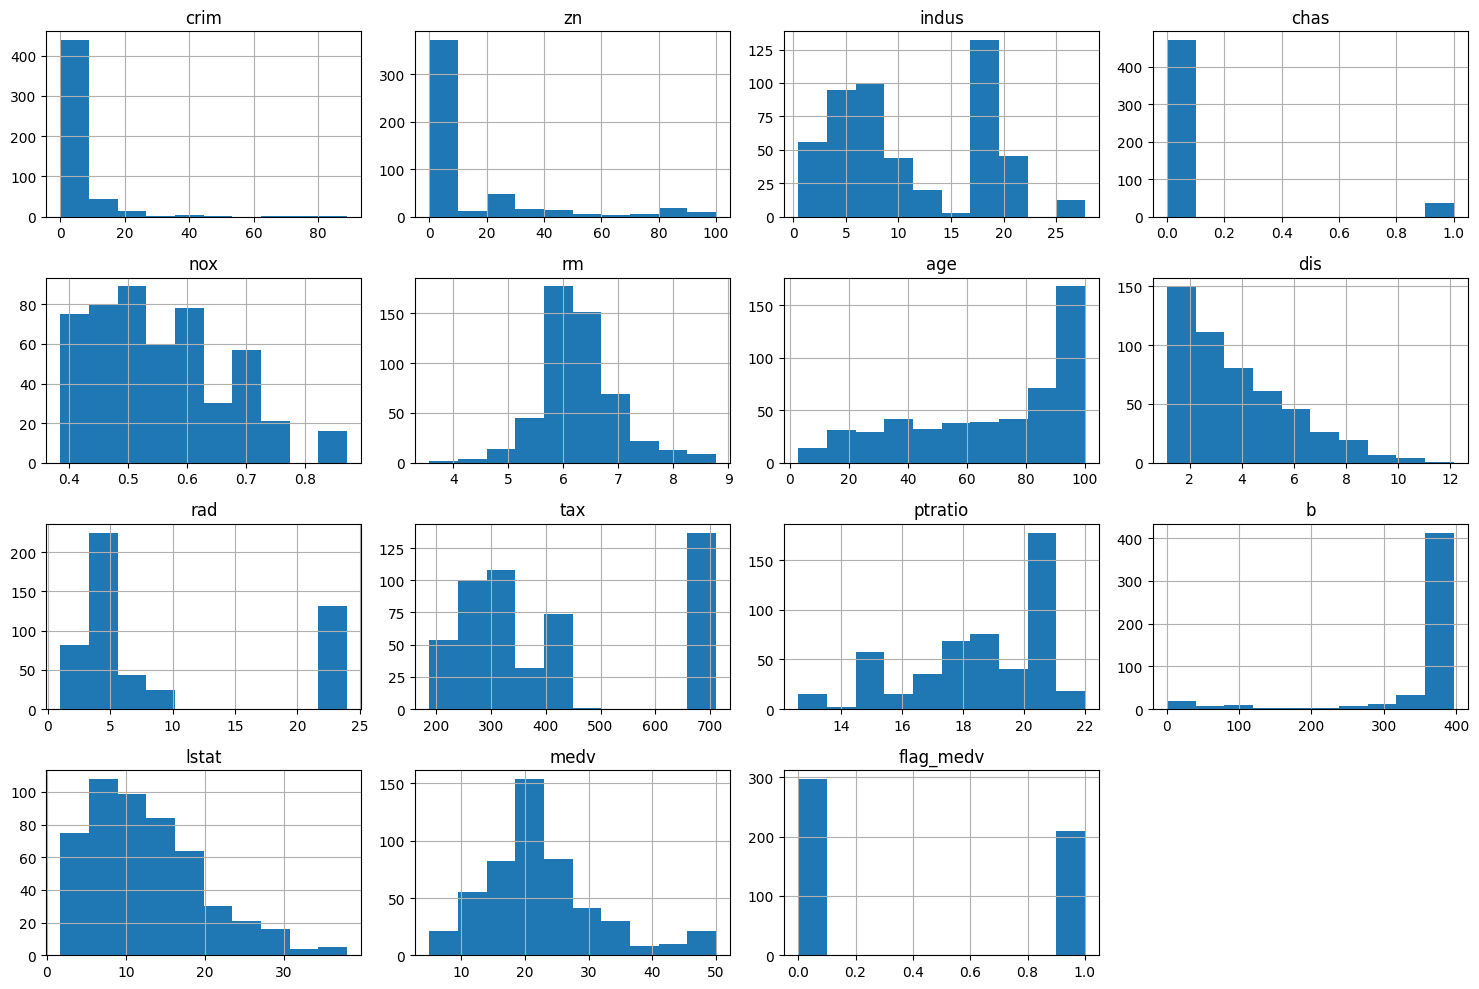

In [22]:
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

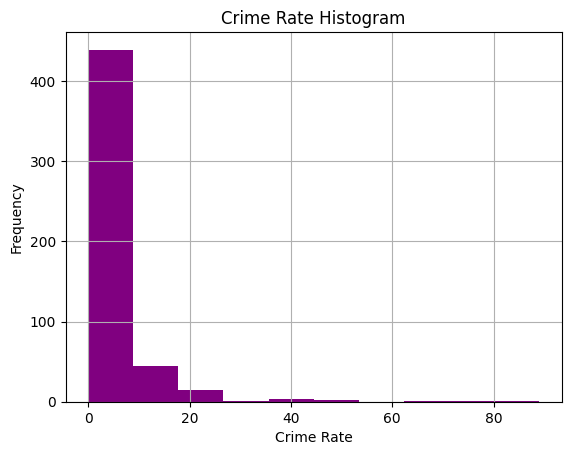

In [27]:
df['crim'].hist(color='purple')
plt.title('Crime Rate Histogram')
plt.xlabel('Crime Rate')
plt.ylabel('Frequency')
plt.show()

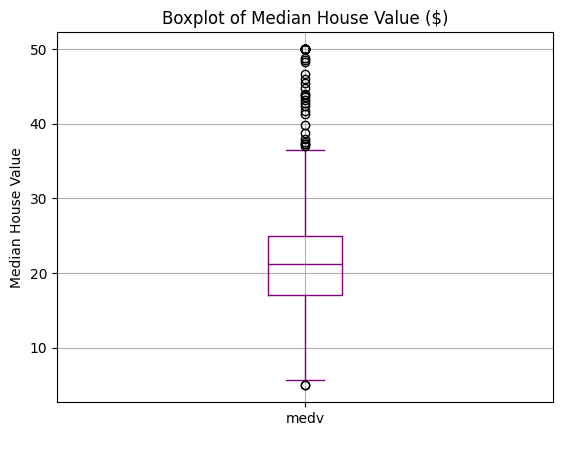

In [30]:
df.boxplot('medv', color='purple')
plt.title('Boxplot of Median House Value ($)')
plt.ylabel('Median House Value')
plt.show()

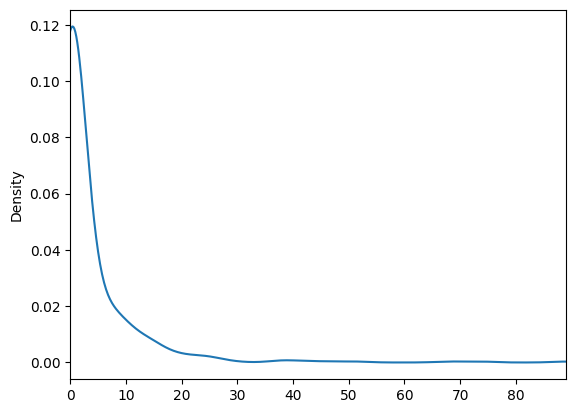

In [34]:
df['crim'].plot.density()
plt.xlim(0, np.max(df['crim']))
plt.show()

## Bivariate Plots
Scatterplots

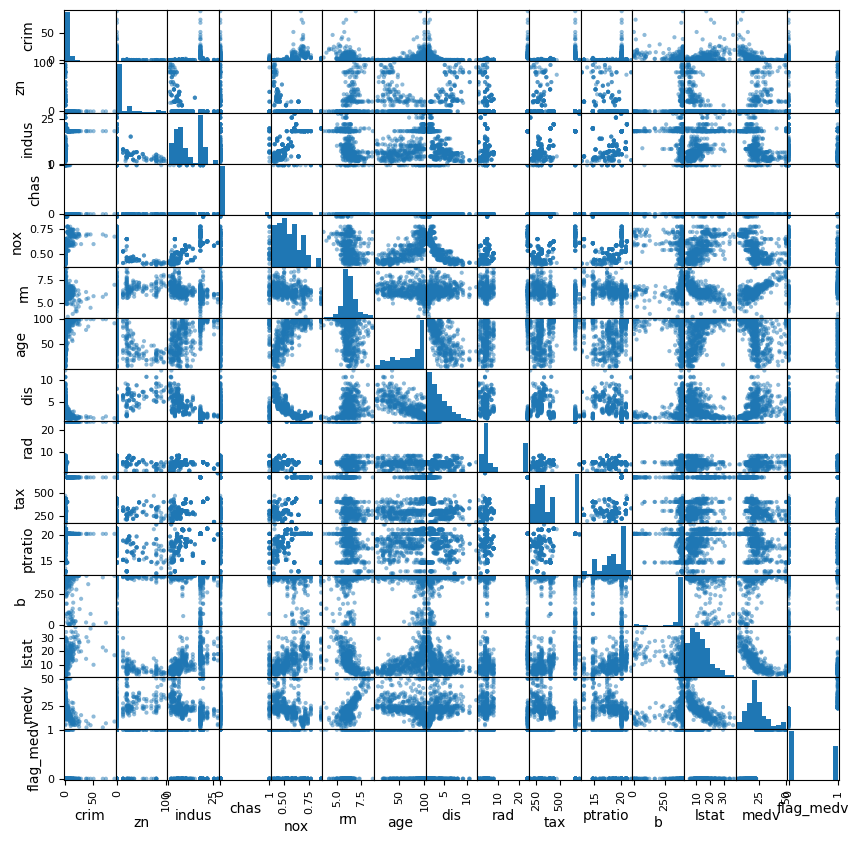

In [35]:
pd.plotting.scatter_matrix(df, figsize=(10,10))
plt.show()

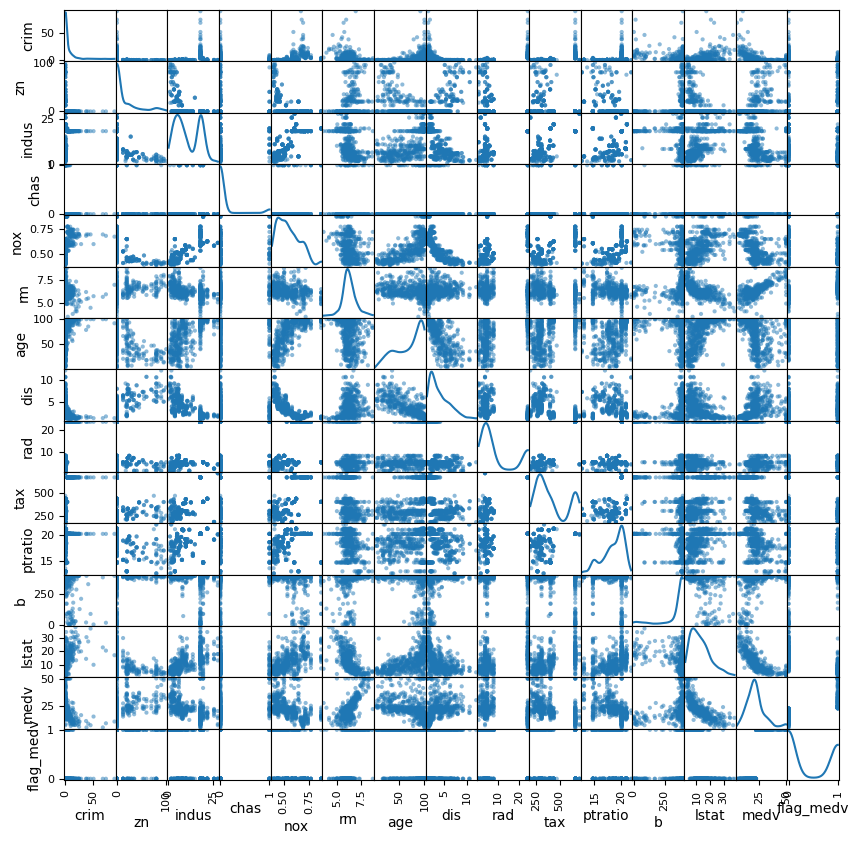

In [36]:
pd.plotting.scatter_matrix(df, diagonal='kde', figsize=(10,10))
plt.show()

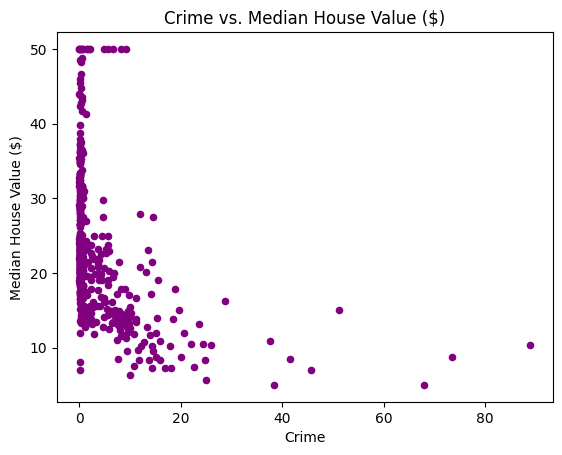

In [41]:
df.plot.scatter(x='crim', y='medv', color='purple')
plt.title('Crime vs. Median House Value ($)')
plt.xlabel('Crime')
plt.ylabel('Median House Value ($)')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff563a17d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff563a16d40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff563a17820>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff563a17250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff563a16ad0>],
 'means': []}

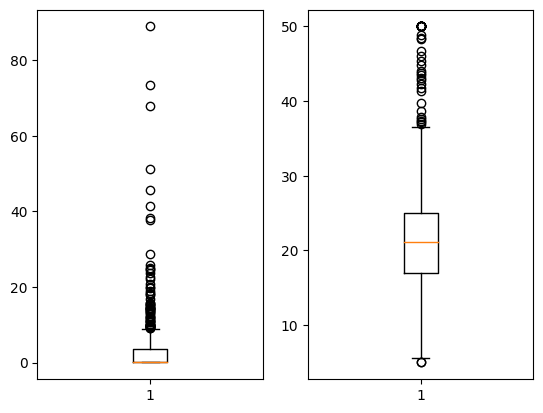

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(df['crim'])
ax2.boxplot(df['medv'])